In [74]:
# importing all the necessary libraries for assignment working
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statistics
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import chi2
import math
import scipy.stats as st
from random import sample
import scipy.stats
from scipy.stats import skew, kurtosis, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import f_oneway
import statsmodels.api as sa

In [ ]:
# 1.	Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results

def z_test_for_sample_mean(sample_mean, population_mean, population_stdev, sample_size):

    # Calculate the z-score
    z = (sample_mean - population_mean) / (population_stdev / math.sqrt(sample_size))

    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(abs(z)))  # Two-tailed test

    return z, p_value


def interpret_z_test(z_statistic, p_value, alpha=0.05):

    if p_value < alpha:
        interpretation = (
            f"The p-value ({p_value:.3f}) is less than the significance level ({alpha}). "
            f"Therefore, we reject the null hypothesis. There is a statistically significant difference "
            f"between the sample mean and the population mean."
        )
    else:
        interpretation = (
            f"The p-value ({p_value:.3f}) is greater than or equal to the significance level ({alpha}). "
            f"Therefore, we fail to reject the null hypothesis. There is no statistically significant difference "
            f"between the sample mean and the population mean."
        )
    return interpretation


# Example Usage
if __name__ == "__main__":
    # Sample data
    sample_mean = 10.2
    population_mean = 10.0
    population_stdev = 1.5
    sample_size = 50

    # Perform the Z-test
    z_statistic, p_value = z_test_for_sample_mean(
        sample_mean, population_mean, population_stdev, sample_size
    )

    # Print results
    print(f"Z-statistic: {z_statistic:.2f}")
    print(f"P-value: {p_value:.3f}")

    # Interpret the results
    interpretation = interpret_z_test(z_statistic, p_value)
    print(interpretation)

Z-statistic: 0.94
P-value: 0.346
The p-value (0.346) is greater than or equal to the significance level (0.05). Therefore, we fail to reject the null hypothesis. There is no statistically significant difference between the sample mean and the population mean.


In [ ]:
# 2.	Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python

np.random.seed(0)
group_a = np.random.normal(loc=5, scale=2, size=50)
group_b = np.random.normal(loc=7, scale=2, size=50)

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
alpha = 0.05

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

T-statistic: -4.131
P-value: 0.000
Reject the null hypothesis: Significant difference between groups.


In [ ]:
# 3.	Implement a one-sample Z-test using Python to compare the sample mean with the population mean


def one_sample_z_test(sample_data, population_mean, population_std, alpha=0.05):

    sample_mean = np.mean(sample_data)
    sample_size = len(sample_data)

    # Calculate the standard error
    standard_error = population_std / np.sqrt(sample_size)

    # Calculate the Z-statistic
    z_statistic = (sample_mean - population_mean) / standard_error

    # Calculate the p-value (two-tailed test)
    p_value = 2 * (1 - st.norm.cdf(abs(z_statistic)))

    # Determine if the null hypothesis is rejected
    if p_value < alpha:
        conclusion = "Reject the null hypothesis."
    else:
        conclusion = "Fail to reject the null hypothesis."

    return z_statistic, p_value, conclusion

# Example Usage
sample_data = [102, 98, 105, 110, 95, 103, 108, 100, 104, 99]
population_mean = 100
population_std = 10
alpha = 0.05

z_stat, p_val, conclusion = one_sample_z_test(sample_data, population_mean, population_std, alpha)

print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_val:.3f}")
print(f"Conclusion: {conclusion}")

Z-statistic: 0.76
P-value: 0.448
Conclusion: Fail to reject the null hypothesis.


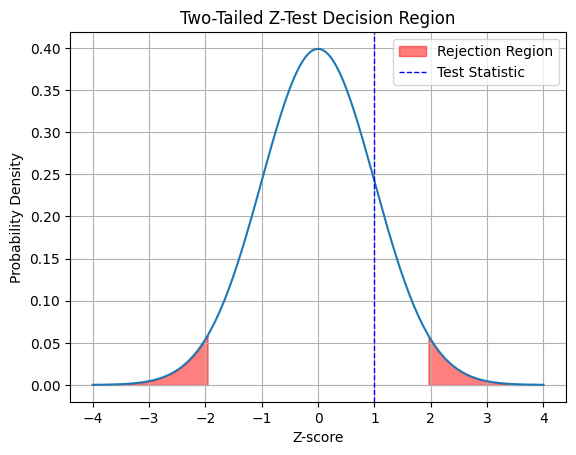

Fail to reject the null hypothesis


In [ ]:
# 4.	Perform a two-tailed Z-test using Python and visualize the decision region on a plot

# Parameters
mu = 0      # Population mean
sigma = 1   # Population standard deviation
n = 50      # Sample size
alpha = 0.05 # Significance level

# Generate sample data
np.random.seed(0)
sample = np.random.normal(mu, sigma, n)
sample_mean = np.mean(sample)

# Calculate the test statistic
z_score = (sample_mean - mu) / (sigma / np.sqrt(n))

# Calculate the critical values
critical_value = st.norm.ppf(1 - alpha/2)

# Create the decision region plot
x = np.linspace(-4, 4, 200)
y = st.norm.pdf(x, 0, 1)
plt.plot(x, y)

# Shade the rejection regions
x_reject_left = np.linspace(-4, -critical_value, 100)
y_reject_left = st.norm.pdf(x_reject_left, 0, 1)
plt.fill_between(x_reject_left, y_reject_left, color='red', alpha=0.5, label='Rejection Region')

x_reject_right = np.linspace(critical_value, 4, 100)
y_reject_right = st.norm.pdf(x_reject_right, 0, 1)
plt.fill_between(x_reject_right, y_reject_right, color='red', alpha=0.5)

# Plot the test statistic
plt.axvline(z_score, color='blue', linestyle='dashed', linewidth=1, label='Test Statistic')

# Add labels and title
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Two-Tailed Z-Test Decision Region')
plt.legend()
plt.grid(True)
plt.show()

# Make a decision
if np.abs(z_score) > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

In [64]:
# 5.	Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing

b = np.array([120, 122, 118, 130, 125, 128, 115, 121, 123, 119])
a = np.array([115, 120, 112, 128, 122, 125, 110, 117, 119, 114])

alpha = 0.05

t_stat, p_val = stats.ttest_rel(a, b)

m = np.mean(a - b)
s = np.std(a - b, ddof=1)
n = len(b)
t_manual = m / (s / np.sqrt(n))

decision = "Reject" if p_val <= alpha else "Fail reject"
concl = "Significant difference." if decision == "Reject" else "No significant difference."

print("T:", t_stat)
print("P:", p_val)
print("T manual:", t_manual)
print(f"Decision: {decision} H0 at α={alpha}")
print("Conclusion:", concl)

T: -9.0
P: 8.538051223166285e-06
T manual: -9.0
Decision: Reject H0 at α=0.05
Conclusion: Significant difference.


In [ ]:
# 6.	Write a Python program to perform an independent T-test and interpret the results

# Sample data for two independent groups
group1 = np.array([25, 30, 35, 40, 45])
group2 = np.array([20, 28, 32, 38, 42])

# Perform independent T-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05 # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.")

T-statistic: 0.5741692517632145
P-value: 0.5816333668955778
Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.


T-statistic: -4.188
P-value: 0.000


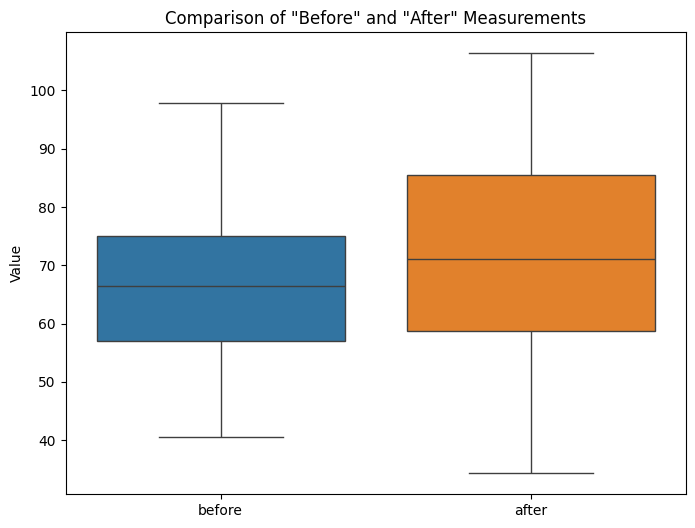

In [ ]:
# 7.	Perform a paired sample T-test using Python and visualize the comparison results

np.random.seed(42) # for reproducibility
before = np.random.normal(loc=70, scale=15, size=50)
after = before + np.random.normal(loc=5, scale=10, size=50)
data = pd.DataFrame({'before': before, 'after': after})
t_statistic, p_value = stats.ttest_rel(data['before'], data['after'])
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Comparison of "Before" and "After" Measurements')
plt.ylabel('Value')
plt.show()

In [ ]:
# 8.	Simulate data and perform both Z-test and T-test, then compare the results using Python

# Set a seed for reproducibility
np.random.seed(0)

# Simulate data for Z-test (large sample)
sample_size_z = 100
mean_z = 50
std_dev_z = 10
data_z = np.random.normal(mean_z, std_dev_z, sample_size_z)

# Simulate data for T-test (small sample)
sample_size_t = 25
mean_t = 52
std_dev_t = 10
data_t = np.random.normal(mean_t, std_dev_t, sample_size_t)

# Hypothesized population mean for Z-test
pop_mean_z = 50
# Population standard deviation for Z-test
pop_std_dev_z = 10

# Calculate the Z-statistic
z_stat = (np.mean(data_z) - pop_mean_z) / (pop_std_dev_z / np.sqrt(sample_size_z))

# Calculate the p-value
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Hypothesized population mean for T-test
pop_mean_t = 50

# Calculate the T-statistic and p-value
t_stat, p_value_t = stats.ttest_1samp(data_t, pop_mean_t)

# Print results
print("Z-test results:")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value_z:.3f}")

print("\nT-test results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value_t:.3f}")

# Compare p-values to significance level (e.g., 0.05)
alpha = 0.05

print("\nInterpretation:")
if p_value_z < alpha:
    print("Z-test: Reject null hypothesis (sample mean significantly different from population mean)")
else:
    print("Z-test: Fail to reject null hypothesis")

if p_value_t < alpha:
    print("T-test: Reject null hypothesis (sample mean significantly different from population mean)")
else:
    print("T-test: Fail to reject null hypothesis")

Z-test results:
Z-statistic: 0.598
P-value: 0.550

T-test results:
T-statistic: 2.672
P-value: 0.013

Interpretation:
Z-test: Fail to reject null hypothesis
T-test: Reject null hypothesis (sample mean significantly different from population mean)


In [72]:
# 9.	Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

sample_data = [10, 12, 15, 18, 20, 22, 25]
lower_bound, upper_bound = confidence_interval(sample_data, confidence=0.95)
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval: (12.42, 22.43)


In [ ]:
# 10.	Write a Python program to calculate the margin of error for a given confidence level using sample data


def calculate_margin_of_error(data, confidence):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
    sample_size = len(data)

    # Calculate the t-score for the given confidence level and degrees of freedom
    degrees_freedom = sample_size - 1
    t_score = st.t.ppf((1 + confidence) / 2, degrees_freedom)

    # Calculate the standard error of the mean
    standard_error = sample_std / np.sqrt(sample_size)

    # Calculate the margin of error
    margin_of_error = t_score * standard_error

    return margin_of_error

if __name__ == '__main__':
    # Example usage
    sample_data = [23, 25, 28, 30, 22, 26, 29, 24, 27, 21]
    confidence_level = 0.95

    margin_error = calculate_margin_of_error(sample_data, confidence_level)
    print(f"Margin of Error: {margin_error:.2f}")

Margin of Error: 2.17


In [ ]:
# 11.	Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process

'''
P(A|B) = [P(B|A) * P(A)] / P(B)

P(A|B): Posterior probability - the probability of hypothesis A given evidence B.
P(B|A): Likelihood - the probability of evidence B given hypothesis A.
P(A): Prior probability - the initial belief about hypothesis A before observing any evidence.
P(B): Marginal probability (or evidence) - the probability of evidence B regardless of the hypothesis.

'''

def bayes_theorem(prior_a, likelihood_b_given_a, evidence_b):

  posterior_a_given_b = (likelihood_b_given_a * prior_a) / evidence_b
  return posterior_a_given_b

# Example usage:
# Prior probability of having a disease (A)
prior_disease = 0.01

# Likelihood of testing positive (B) given you have the disease (A)
likelihood_positive_given_disease = 0.99

# Likelihood of testing positive given you don't have the disease
likelihood_positive_given_no_disease = 0.05

# Probability of testing positive (evidence B)
evidence_positive = (likelihood_positive_given_disease * prior_disease) + (likelihood_positive_given_no_disease * (1 - prior_disease))


# Calculate the posterior probability of having the disease given a positive test
posterior_disease_given_positive = bayes_theorem(prior_disease, likelihood_positive_given_disease, evidence_positive)

print(f"Posterior probability of having the disease given a positive test: {posterior_disease_given_positive:.4f}")


Posterior probability of having the disease given a positive test: 0.1667


In [ ]:
# 12.	Perform a Chi-square test for independence between two categorical variables in Python

# Sample data (replace with your data)
data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
        'Smoker': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes']}
df = pd.DataFrame(data)

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Smoker'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")


Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
 [[2. 2.]
 [2. 2.]]
Fail to reject the null hypothesis: There is no significant association between the variables.


In [ ]:
# 13.	Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data

def calculate_expected_frequencies(observed_data):

    observed_data = np.array(observed_data)
    row_totals = observed_data.sum(axis=1)
    col_totals = observed_data.sum(axis=0)
    total = observed_data.sum()

    expected_frequencies = np.outer(row_totals, col_totals) / total
    return expected_frequencies

if __name__ == '__main__':
    # Example usage
    observed_data = np.array([[20, 30, 20], [10, 40, 10]])
    expected_frequencies = calculate_expected_frequencies(observed_data)

    print("Observed Frequencies:")
    print(observed_data)
    print("\nExpected Frequencies:")
    print(expected_frequencies)

Observed Frequencies:
[[20 30 20]
 [10 40 10]]

Expected Frequencies:
[[16.15384615 37.69230769 16.15384615]
 [13.84615385 32.30769231 13.84615385]]


In [ ]:
# 14.	Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution

def goodness_of_fit_test(observed, expected):

    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    return chi2_stat, p_value

# Example usage:
observed_frequencies = np.array([25, 30, 20, 25])
expected_frequencies = np.array([20, 35, 25, 20])

chi2, p = goodness_of_fit_test(observed_frequencies, expected_frequencies)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 4.214285714285714
P-value: 0.239235500667051


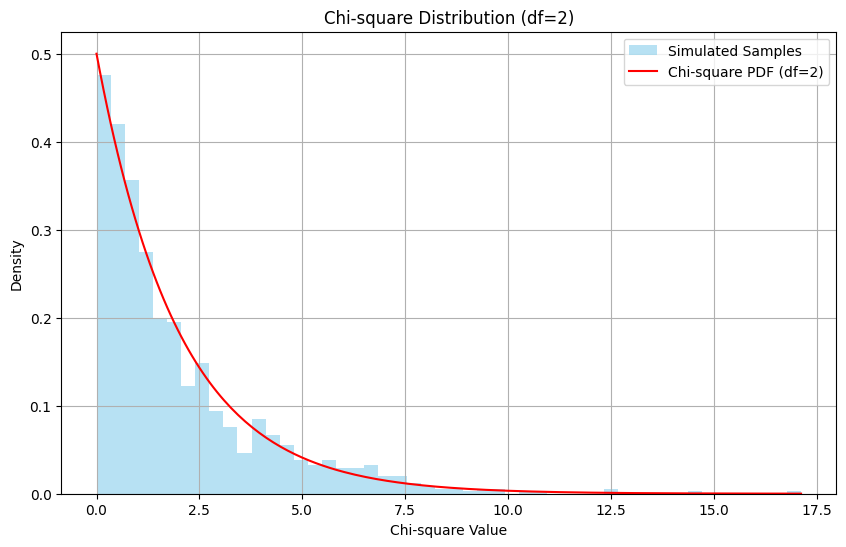

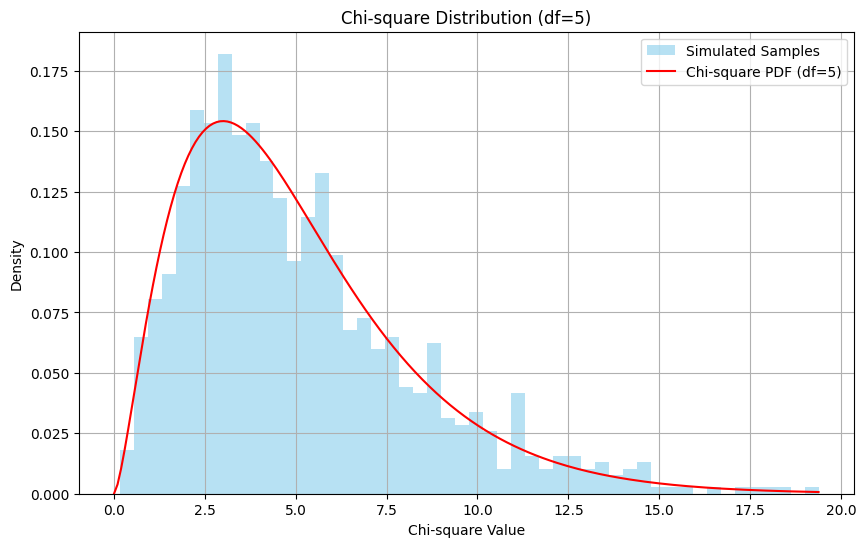

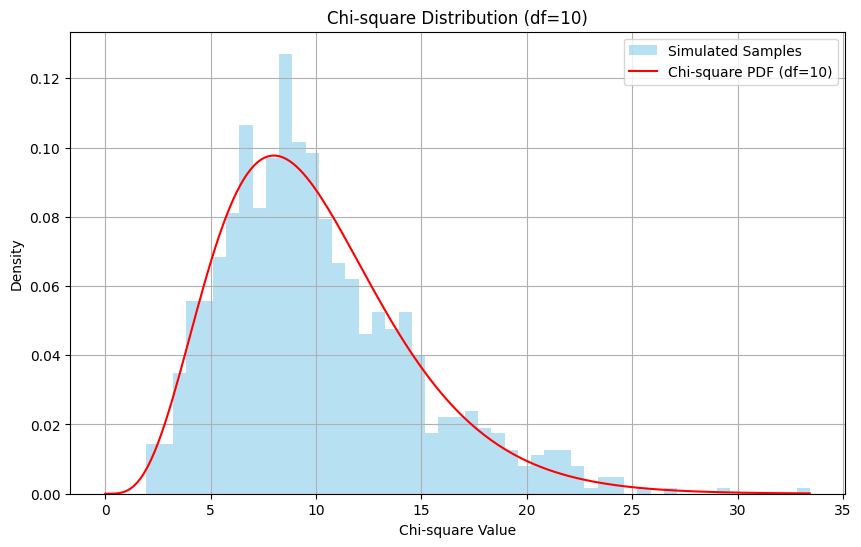

In [ ]:
# 15.	Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics


# Function to simulate and visualize the Chi-square distribution
def visualize_chisquare(degrees_freedom, num_samples=1000):

    # Generate random samples from a Chi-square distribution
    chisquare_samples = np.random.chisquare(degrees_freedom, num_samples)

    # Create a range of x-values for plotting the PDF
    x = np.linspace(0, max(chisquare_samples), 200)

    # Calculate the probability density function (PDF)
    pdf = stats.chi2.pdf(x, degrees_freedom)

    # Plot the histogram of simulated samples and the PDF
    plt.figure(figsize=(10, 6))
    plt.hist(chisquare_samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Simulated Samples')
    plt.plot(x, pdf, 'r-', label=f'Chi-square PDF (df={degrees_freedom})')

    # Set labels and title
    plt.xlabel("Chi-square Value")
    plt.ylabel("Density")
    plt.title(f"Chi-square Distribution (df={degrees_freedom})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
degrees_of_freedom_values = [2, 5, 10]
for df in degrees_of_freedom_values:
    visualize_chisquare(df)

In [ ]:
# 16.	Implement an F-test using Python to compare the variances of two random samples


def f_test(sample1, sample2):
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    f_statistic = var1 / var2 if var1 > var2 else var2 / var1

    df1 = len(sample1) - 1
    df2 = len(sample2) - 1

    p_value = 2 * min(stats.f.cdf(f_statistic, df1, df2), 1 - stats.f.cdf(f_statistic, df1, df2))

    return f_statistic, p_value

# Example Usage:
sample1 = np.array([10, 12, 15, 13, 18, 11, 14, 16, 17, 19])
sample2 = np.array([5, 8, 6, 9, 7, 10, 4, 8, 7, 6])

f_stat, p_val = f_test(sample1, sample2)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: Variances are not significantly different.")

F-statistic: 2.7500
P-value: 0.1479
Fail to reject the null hypothesis: Variances are not significantly different.


In [ ]:
# 17.	Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results

def anova_test(data, formula):

    try:
        # Fit the model
        model = ols(formula, data=data).fit()

        # Perform ANOVA
        anova_table = sm.stats.anova_lm(model, typ=2)

        # Print the ANOVA table
        print("ANOVA Table:\n", anova_table)

        # Interpret the results
        p_value = anova_table['PR(>F)'][0]
        if p_value < 0.05:
            print("\nInterpretation: There is a statistically significant difference in means between at least two groups.")
        else:
            print("\nInterpretation: There is no statistically significant difference in means between the groups.")
    except Exception as e:
        print(f"Error during ANOVA test: {e}")

if __name__ == '__main__':
    # Sample data (replace with your actual data)
    data = pd.DataFrame({
        'group': ['A', 'A', 'B', 'B', 'C', 'C', 'C'],
        'value': [10, 12, 15, 18, 20, 22, 25]
    })

    # ANOVA formula
    formula = 'value ~ C(group)'

    # Perform ANOVA test
    anova_test(data, formula)


ANOVA Table:
               sum_sq   df          F    PR(>F)
C(group)  156.547619  2.0  16.335404  0.011898
Residual   19.166667  4.0        NaN       NaN

Interpretation: There is a statistically significant difference in means between at least two groups.


<ipython-input-31-2874381746>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


In [ ]:
# 18.	Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results


np.random.seed(0)
group1 = np.random.normal(5, 1, 50)
group2 = np.random.normal(6, 1.2, 50)
group3 = np.random.normal(7, 1.5, 50)

data = pd.DataFrame({'value': np.concatenate([group1, group2, group3]),
                     'group': np.repeat(['Group 1', 'Group 2', 'Group 3'], 50)})
model = ols('value ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq     df          F        PR(>F)
C(group)  128.676869    2.0  39.852135  1.484349e-14
Residual  237.321032  147.0        NaN           NaN


In [77]:
# 19.	Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA


def check_anova_assumptions(data, dv, between, alpha=0.05):

    results = {}

    # Normality check
    normality_results = {}
    for group in data[between].unique():
        group_data = data[data[between] == group][dv]
        shapiro_test = stats.shapiro(group_data)
        normality_results[group] = {
            "statistic": shapiro_test.statistic,
            "pvalue": shapiro_test.pvalue,
            "normal": shapiro_test.pvalue > alpha
        }
    results["normality"] = normality_results

    # Independence check (assumed from study design)
    results["independence"] = "Assumed from study design. Ensure data points are independent."

    # Equal variance check (Levene's test)
    levene_test = stats. levene(
        * [data[data[between] == group][dv] for group in data[between].unique()]
    )
    results["equal_variance"] = {
        "statistic": levene_test.statistic,
        "pvalue": levene_test.pvalue,
        "equal_variance": levene_test.pvalue > alpha
    }

    return results

if __name__ == '__main__':
    # Example Usage with dummy data
    np.random.seed(42)
    n_samples = 20
    group_a = np.random.normal(loc=10, scale=2, size=n_samples)
    group_b = np.random.normal(loc=12, scale=2.5, size=n_samples)
    group_c = np.random.normal(loc=11, scale=2.2, size=n_samples)

    data = pd.DataFrame({
        'value': np.concatenate([group_a, group_b, group_c]),
        'group': ['A'] * n_samples + ['B'] * n_samples + ['C'] * n_samples
    })

    assumption_results = check_anova_assumptions(data, 'value', 'group')

    print("ANOVA Assumption Checks:")
    for assumption, result in assumption_results.items():
        print(f"\n{assumption.capitalize()}:")
        if isinstance(result, dict):
            for key, value in result.items():
                if isinstance(value, dict):
                    print(f"  {key}:")
                    for k, v in value.items():
                        print(f"    {k}: {v}")
                else:
                    print(f"  {key}: {value}")
        else:
            print(f"  {result}")

ANOVA Assumption Checks:

Normality:
  A:
    statistic: 0.9746255361563145
    pvalue: 0.8478800044350965
    normal: True
  B:
    statistic: 0.9706031576175146
    pvalue: 0.7675616535134634
    normal: True
  C:
    statistic: 0.9472353255591323
    pvalue: 0.327064356908086
    normal: True

Independence:
  Assumed from study design. Ensure data points are independent.

Equal_variance:
  statistic: 0.6820520003095101
  pvalue: 0.5096563511523355
  equal_variance: True


Normality Check:
  Group A: Shapiro-Wilk p-value = 0.693
    Data in group A appears normally distributed.


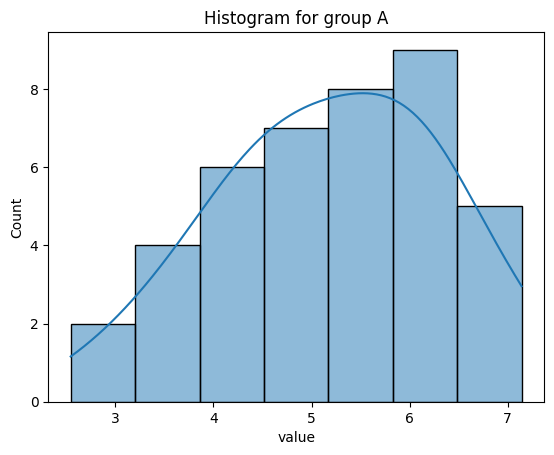

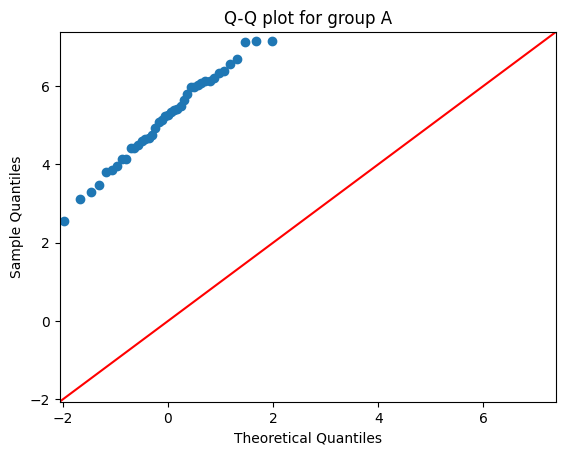

  Group C: Shapiro-Wilk p-value = 0.846
    Data in group C appears normally distributed.


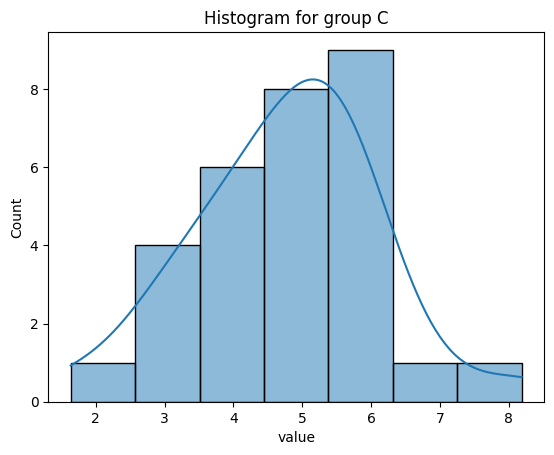

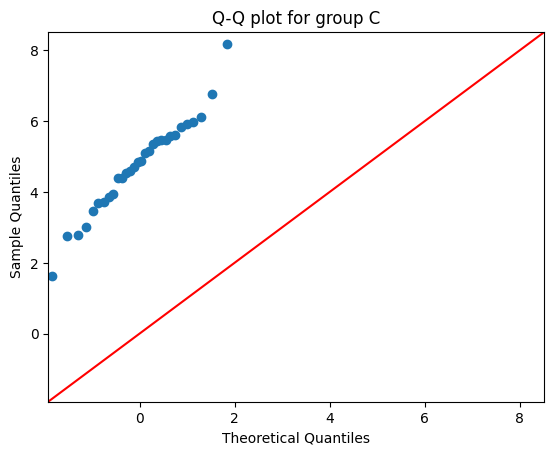

  Group B: Shapiro-Wilk p-value = 0.476
    Data in group B appears normally distributed.


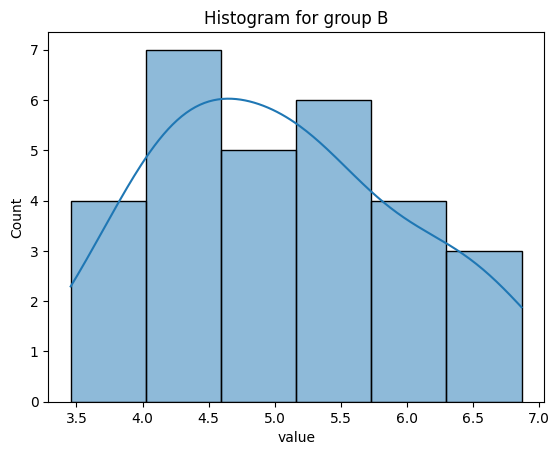

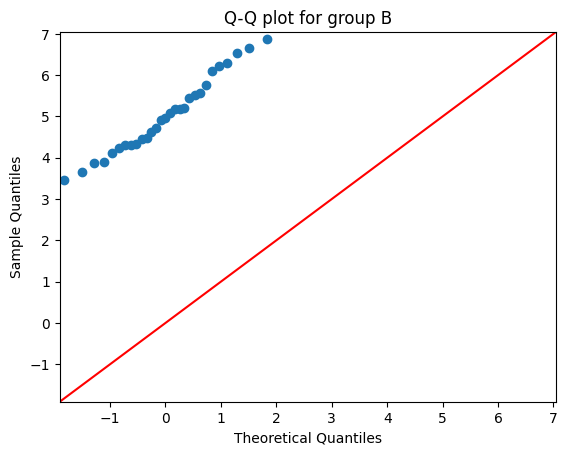


Independence Check:
  Independence is assumed based on study design. Check for any dependencies in data gathering procedure.

Equal Variance Check:
  Levene's test p-value = 0.355
  Variances appear to be equal across groups.


AttributeError: module 'statsmodels.api' has no attribute 'ols'

In [75]:
# 20.	Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results


def check_anova_assumptions(data, dependent_variable, independent_variable):

    # 1. Normality
    print("Normality Check:")
    for group in data[independent_variable].unique():
        group_data = data[dependent_variable][data[independent_variable] == group]
        stat, p = stats.shapiro(group_data)
        print(f"  Group {group}: Shapiro-Wilk p-value = {p:.3f}")
        if p > 0.05:
            print(f"    Data in group {group} appears normally distributed.")
        else:
            print(f"    Data in group {group} may not be normally distributed.")
        sns.histplot(group_data, kde=True)
        plt.title(f"Histogram for group {group}")
        plt.show()
        sa.qqplot(group_data, line='45')
        plt.title(f"Q-Q plot for group {group}")
        plt.show()


    # 2. Independence
    print("\nIndependence Check:")
    print("  Independence is assumed based on study design. Check for any dependencies in data gathering procedure.")

    # 3. Equal Variance (Homoscedasticity)
    print("\nEqual Variance Check:")
    stat, p = stats.levene(
        *[data[dependent_variable][data[independent_variable] == g] for g in data[independent_variable].unique()]
    )
    print(f"  Levene's test p-value = {p:.3f}")
    if p > 0.05:
        print("  Variances appear to be equal across groups.")
    else:
        print("  Variances may not be equal across groups.")

    # Residuals vs. Fitted plot for visual check of equal variance
    model = sa.ols(f"{dependent_variable} ~ C({independent_variable})", data=data).fit()
    sns.scatterplot(x=model.fittedvalues, y=model.resid)
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Fitted values")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

if __name__ == '__main__':
    # Sample Usage
    data = pd.DataFrame({
        'value': np.random.normal(loc=5, scale=1, size=100),
        'group': np.random.choice(['A', 'B', 'C'], size=100)
    })

    check_anova_assumptions(data, 'value', 'group')

    data_unequal_variance = pd.DataFrame({
        'value': np.concatenate([np.random.normal(loc=5, scale=1, size=30),
                                np.random.normal(loc=5, scale=2, size=30),
                                np.random.normal(loc=5, scale=3, size=40)]),
        'group': np.concatenate([['A']*30, ['B']*30, ['C']*40])
    })

    check_anova_assumptions(data_unequal_variance, 'value', 'group')

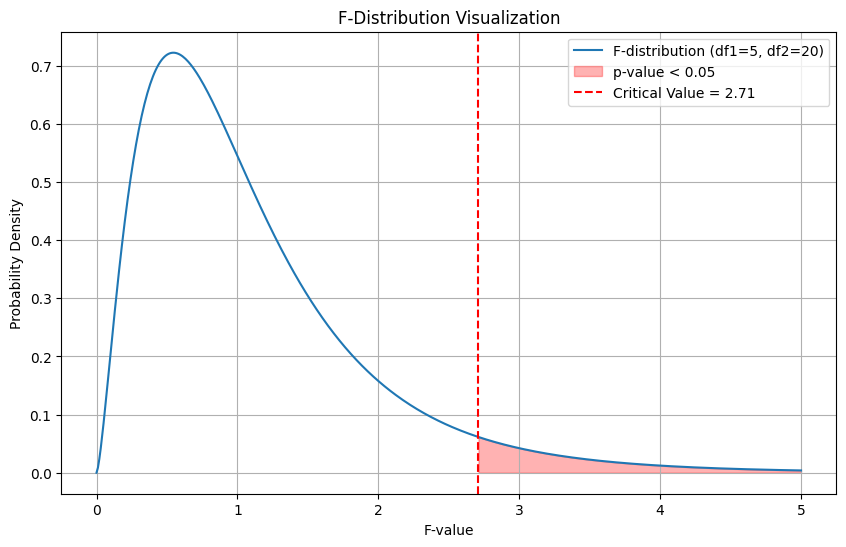

Critical F-value for alpha=0.05: 2.71


In [ ]:
# 21.	Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing

# Define the degrees of freedom
df1 = 5  # numerator degrees of freedom
df2 = 20 # denominator degrees of freedom

# Generate x values for the plot
x = np.linspace(0, 5, 500)

# Calculate the probability density function (PDF) of the F-distribution
y = f.pdf(x, df1, df2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})')
plt.title('F-Distribution Visualization')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()

# Shade the area corresponding to a p-value of 0.05
critical_value = f.ppf(0.95, df1, df2) # 0.95 corresponds to 95% confidence level
x_fill = np.linspace(critical_value, 5, 100)
y_fill = f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label='p-value < 0.05')
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value = {critical_value:.2f}')

plt.legend()
plt.show()

print(f"Critical F-value for alpha=0.05: {critical_value:.2f}")

In [ ]:
# 22.	Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means


performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

f_statistic, p_value = f_oneway(performance1, performance2, performance3, performance4)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

'''
sns.boxplot(data=data)
plt.title('Comparison of "Before" and "After" Measurements')
plt.ylabel('Value')
plt.show()
'''

F-statistic: 4.625000000000002
P-value: 0.016336459839780215


In [42]:
# 23.	Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means

# 1. Simulate data
# Sample 1
np.random.seed(42)
sample_size = 50
mean1 = 10
std_dev1 = 2
sample1 = np.random.normal(loc=mean1, scale=std_dev1, size=sample_size)

# Sample 2
mean2 = 12
std_dev2 = 2
sample2 = np.random.normal(loc=mean2, scale=std_dev2, size=sample_size)

# 2. Hypothesis testing
# Define significance level
alpha = 0.05

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# 3. Interpretation
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


T-statistic: -6.872731683285841
P-value: 5.877565294167719e-10
Reject the null hypothesis: The means are significantly different.


In [54]:
# 24.	Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results


def chi_square_variance_test(data, sigma_0, alpha=0.05, test_type="two_sided"):

    n = len(data)
    sample_variance = np.var(data, ddof=1)  # Sample variance (using ddof=1 for unbiased estimator)

    # Calculate chi-square statistic
    chi2_stat = (n - 1) * sample_variance / sigma_0

    # Determine degrees of freedom
    df = n - 1

    # Calculate p-value based on test type
    if test_type == "two_sided":
        p_value = 2 * min(chi2.cdf(chi2_stat, df), 1 - chi2.cdf(chi2_stat, df))
    elif test_type == "less":
        p_value = chi2.cdf(chi2_stat, df)
    elif test_type == "greater":
        p_value = 1 - chi2.cdf(chi2_stat, df)
    else:
        raise ValueError("Invalid test_type. Choose from 'two_sided', 'less', or 'greater'.")

    # Make a decision
    if p_value < alpha:
        reject_null = True
    else:
        reject_null = False

    return chi2_stat, p_value, reject_null

# Example usage:
sample_data = [12, 15, 18, 13, 17, 16, 14, 19, 20, 11]
hypothesized_variance = 10  # Example value
alpha_level = 0.05

# Perform the test
test_statistic, p_value, reject_null = chi_square_variance_test(sample_data, hypothesized_variance, alpha_level)

# Print the results
print(f"Chi-square statistic: {test_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Reject the null hypothesis: {reject_null}")

if reject_null:
    print("The null hypothesis is rejected. The population variance is significantly different from the hypothesized value.")
else:
    print("The null hypothesis is not rejected. There is no sufficient evidence to conclude that the population variance is different from the hypothesized value.")


Chi-square statistic: 8.2500
P-value: 0.9817
Reject the null hypothesis: False
The null hypothesis is not rejected. There is no sufficient evidence to conclude that the population variance is different from the hypothesized value.


In [5]:
# 25.	Write a Python script to perform a Z-test for comparing proportions between two datasets or groups

def z_test_proportions(successes1, n1, successes2, n2, alternative='two-sided', alpha=0.05):

    if not isinstance(successes1, int) or not isinstance(n1, int) or not isinstance(successes2, int) or not isinstance(n2, int):
      raise ValueError("Number of successes and total trials must be integers.")
    if n1 <= 0 or n2 <= 0:
        raise ValueError("Total number of trials must be greater than 0.")
    if successes1 < 0 or successes2 < 0 or successes1 > n1 or successes2 > n2:
        raise ValueError("Number of successes must be non-negative and less than or equal to the total trials.")
    if alternative not in ['two-sided', 'larger', 'smaller']:
        raise ValueError("Alternative must be 'two-sided', 'larger', or 'smaller'.")
    if not (0 < alpha < 1):
        raise ValueError("Alpha must be between 0 and 1.")

    count = np.array([successes1, successes2])
    nobs = np.array([n1, n2])

    z_statistic, p_value = sm.stats.proportions_ztest(count, nobs, alternative=alternative)

    reject_null = p_value < alpha
    return z_statistic, p_value, reject_null

if __name__ == '__main__':
    # Example usage:
    successes1 = 100
    n1 = 500
    successes2 = 120
    n2 = 600
    alternative_hypothesis = 'two-sided'
    alpha_level = 0.05

    z_stat, p_val, reject = z_test_proportions(successes1, n1, successes2, n2, alternative=alternative_hypothesis, alpha=alpha_level)

    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Reject Null Hypothesis: {reject}")

    if reject:
        print("There is a significant difference in proportions between the two groups.")
    else:
        print("There is no significant difference in proportions between the two groups.")

Z-statistic: 0.0000
P-value: 1.0000
Reject Null Hypothesis: False
There is no significant difference in proportions between the two groups.


In [4]:
# 26.	Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

# Create the data for two groups
group1 = np.random.rand(25)
group2 = np.random.rand(20)

# Calculate the sample variances
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 24
Degree of freedom 2: 19
F-statistic: 0.673051736054155
p-value: 0.1782494307909782


Chi-square statistic: 3.32
P-value: 0.651
Fail to reject the null hypothesis: The observed distribution is not significantly different from the expected distribution.


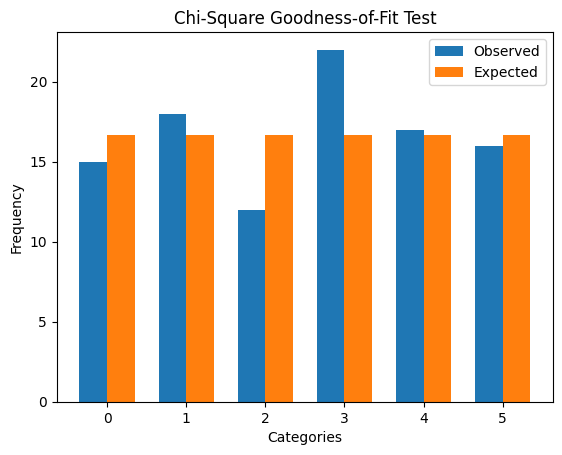

In [3]:
# 27.	Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

# 1. Generate simulated data
# Example: Simulate rolling a fair six-sided die 100 times
observed_frequencies = np.array([15, 18, 12, 22, 17, 16])
num_trials = np.sum(observed_frequencies)

# 2. Define expected frequencies (e.g., for a fair die)
expected_probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
expected_frequencies = num_trials * expected_probabilities

# 3. Perform the Chi-square test
chi2_statistic, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# 4. Analyze the results
alpha = 0.05  # Significance level

print(f"Chi-square statistic: {chi2_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Reject the null hypothesis: The observed distribution is significantly different from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution is not significantly different from the expected distribution.")

# Optional: Visualize the results
import matplotlib.pyplot as plt

categories = np.arange(len(observed_frequencies))
bar_width = 0.35

fig, ax = plt.subplots()
bars_observed = ax.bar(categories - bar_width/2, observed_frequencies, bar_width, label='Observed')
bars_expected = ax.bar(categories + bar_width/2, expected_frequencies, bar_width, label='Expected')

ax.set_xlabel('Categories')
ax.set_ylabel('Frequency')
ax.set_title('Chi-Square Goodness-of-Fit Test')
ax.set_xticks(categories)
ax.legend()

plt.show()

In [ ]:
#